# <font color='green'><b> Point Processing </b></font>

### Credits: Hands-on Image Processing with Python, Chapter 1 & 4 - Author: Sandipan Dey 

### <font color='green'><b>Import libraries</b></font>

TUTORIALS: 
- opencv: https://docs.opencv.org/4.x/d1/dfb/intro.html
- pillow: https://pillow.readthedocs.io/en/stable/
- skimage: https://scikit-image.org/docs/stable/
- matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
- numpy: https://numpy.org/devdocs/user/quickstart.html
- os: https://www.tutorialsteacher.com/python/os-module
- plotly: https://plotly.com/python/getting-started/
 

In [39]:
import skimage
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color,  exposure, img_as_float,img_as_ubyte, data #viewer (deprecated)
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc #Various utilities that don’t have another home
import plotly.express as px   
import cv2

#MODIFY THESE PATHS TO POINT TO YOUR IMAGES
img_dir = '../Immagini_IN/'
out_dir = '../Immagini_OUT/'

# <font color='green'><b> 1 - Image Inspection </b></font>



###  1.1 Computing the basic statistics of an image using the library `stat` in *PIL* 

In [2]:
im = Image.open(img_dir + "cycle.jpg") # read the image, provide the correct path)
s = stat.Stat(im)

print("Extrema in R,G,B: " + str(s.extrema)) # maximum and minimum pixel values for each channel R, G, B
print("Nb. of pixels in R,G,B: " + str(s.count))
print("RGB means: "  + str(s.mean))
print("RGB medians: " +  str(s.median))
print("RGB std dev.: " + str(s.stddev))
   

Extrema in R,G,B: [(0, 255), (0, 255), (0, 255)]
Nb. of pixels in R,G,B: [136340, 136340, 136340]
RGB means: [136.25430541293824, 156.06854188059265, 175.82981516796244]
RGB medians: [145, 170, 202]
RGB std dev.: [71.03287851929761, 65.84030985802924, 75.93182835183828]


### 1.2 Histogram with PIL
- Plotting the histograms of pixel values for the RGB channels of an image using *PIL*  

lenght of the histogram: 768


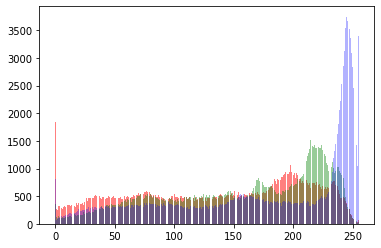

In [ ]:
pl = im.histogram() #produce a list of 256*3  elements to be split in r,g,b
print("lenght of the histogram: " + str(len(pl)))
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

##  <font color='green'><b> Histogram using *NUMPY* functions  </b></font>

- <font color='green'><b> Histogram of gray level images using *NUMPY*:    </b></font>


Text(0.5, 1.0, 'Normalized histogram')

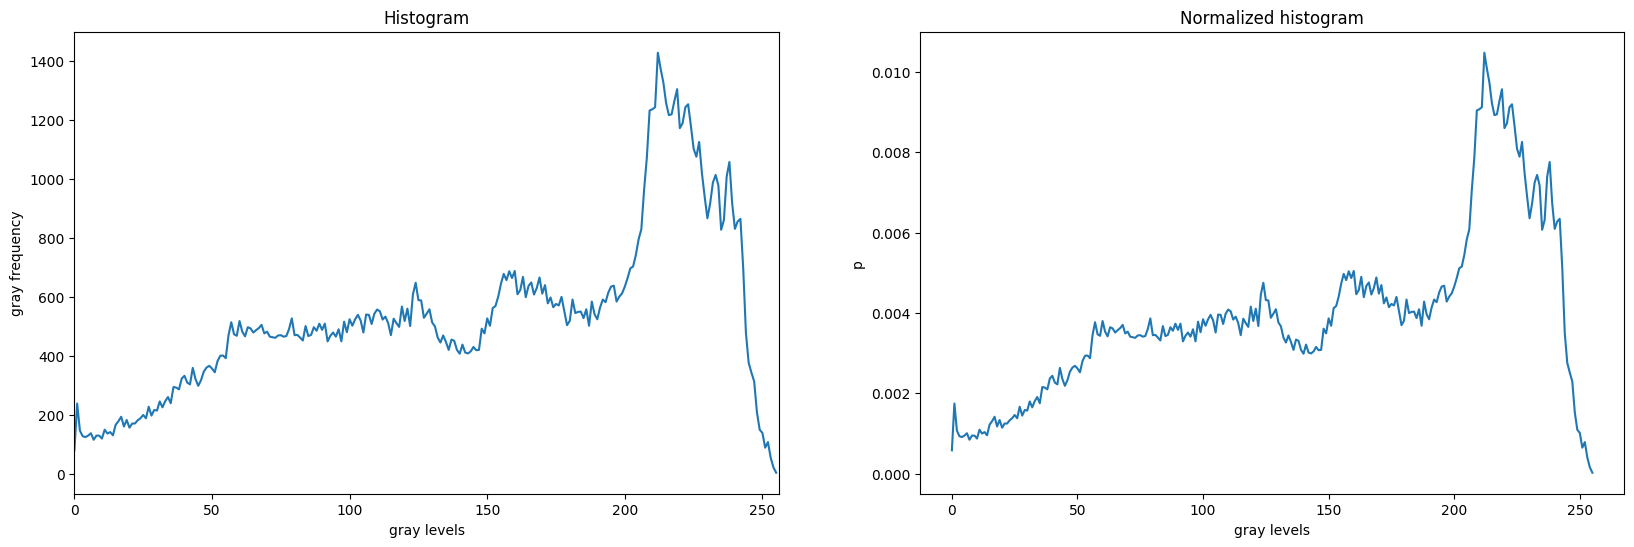

In [47]:
im =imread(img_dir + "cycle.jpg")
h,w,_ = im.shape

gray = img_as_ubyte(color.rgb2gray(im))
#We use np function:
hist, _  = np.histogram(gray.flatten(),256,  [0,255]) #Omit the 2nd output, that is "bin"

#gray.flatten() => converte l'immagine in vettore 

# show the plotting graph of an image 
plt.figure(figsize= (20,6))
plt.subplot(121) 
plt.plot(hist) 
plt.ylabel('gray frequency');
plt.xlabel('gray levels');
plt.title('Histogram')
plt.xlim([0,256])


# (2) Normalized histogram
p = hist / (h*w) 
plt.subplot(122) 
plt.plot(p) 
plt.ylabel('p');
plt.xlabel('gray levels');
plt.title('Normalized histogram')


- <font color='green'><b> Histogram of color images using *NUMPY*:  </b></font>


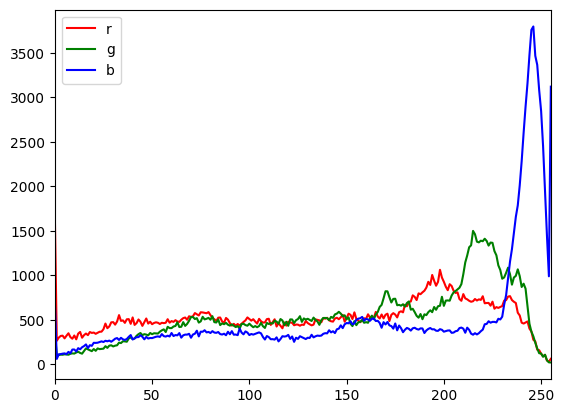

In [49]:
img = np.array(im) 
for i, col in enumerate(['r', 'g', 'b']):
  hist, _ = np.histogram(img[:,:,i].flatten(), 256, [0,255])
  plt.plot(hist, color = col, label= col)
plt.xlim([0, 255])
plt.legend()  #it takes the values from the variable "label" otherwise pass the list ['r', 'g', 'b'] as agument

- <font color='green'><b> For visualization only use `matplotlib.pyplot` (imported as `plt`):  </b></font>


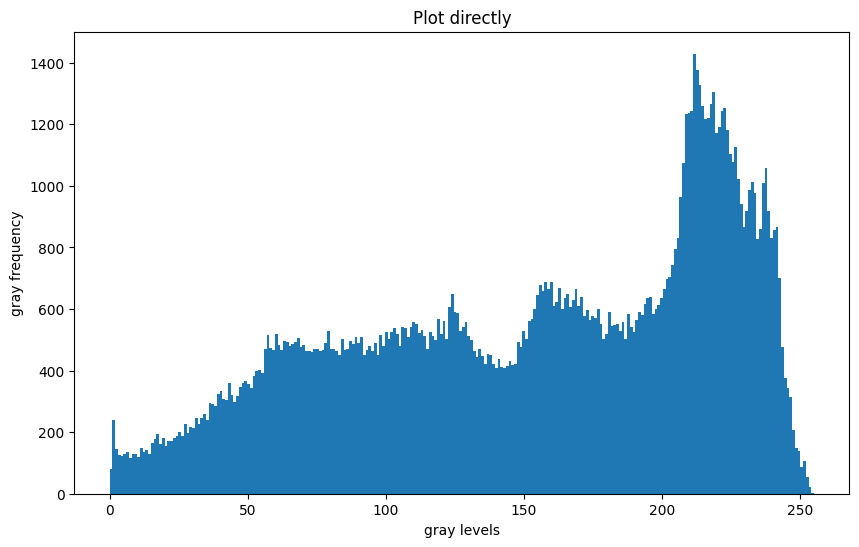

In [55]:
plt.figure(figsize= (10,6))
plt.hist(gray.flatten(), bins=256, range=(0, 255)) #calculating histogram
plt.ylabel('gray frequency');
plt.xlabel('gray levels');
plt.title('Plot directly');

- <font color='green'><b> For interactive histograms, use `plotly.graph_objects` imported as `go`:  </b></font>

 

In [ ]:
import plotly.graph_objects as go

data=[go.Histogram(x=gray.ravel())]
fig = go.Figure(data)
fig.show()

- <font color='green'><b> Cumulative Histogram:  </b></font>

  

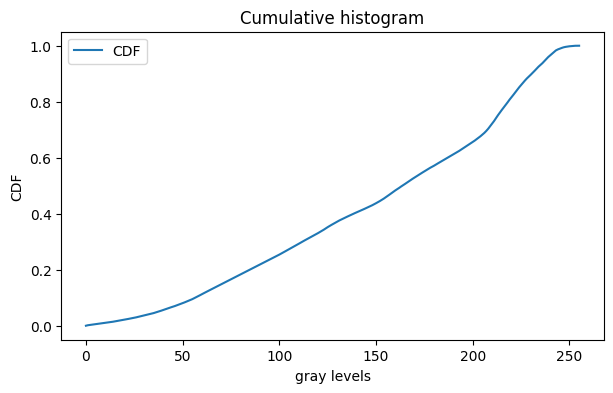

In [65]:
#First, compute the histogram
hist, _  = np.histogram(gray.flatten(),256,  [0,255]) #Omit the 2nd output, that is "bin"

# Second, get the cumulative sum of the elements
cdf = hist.cumsum()
 
# Thirsd, normalize the cdf
normalized_cdf = cdf / float(cdf.max())

#Plot the CDF
plt.figure(figsize=(7,4))
plt.plot(normalized_cdf, label='CDF')
plt.title('Cumulative histogram')
plt.xlabel('gray levels')
plt.ylabel('CDF')
plt.legend(loc='upper left')


In [66]:
#Interactive:

fig = go.Figure(data=[go.Histogram(x=gray.flatten(), cumulative_enabled=True)])  
fig.show()

- ### <font color='green'><b>EXERCISE 1: </b></font>


Add the grid, the title, the xlabel, and the ylabel to the previous plot


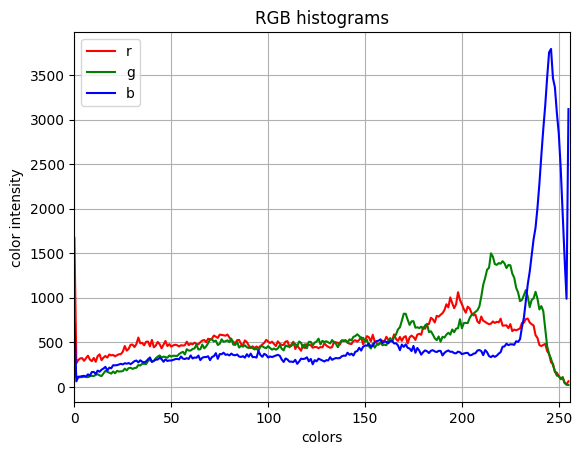

In [67]:
for i, col in enumerate(['r', 'g', 'b']):

    hist, bin = np.histogram(img[:,:,i].flatten(), 256, [0,256])
    plt.plot(hist, color = col, label= col)
    plt.xlim([0, 256])

plt.ylabel('color intensity');
plt.xlabel('colors');
plt.title('RGB histograms');
plt.grid()
plt.legend()
plt.show()

- ### <font color='green'><b>EXERCISE 2: </b></font>

Compute the mean of the 3-band histogram and over plot the obtained average histogram to the gray-level histogram

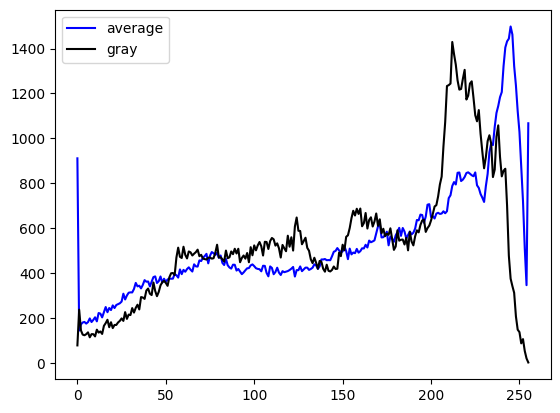

In [69]:
hist_av =  np.zeros(256)
 
for i, col in enumerate(['b', 'g', 'r']):
    hist, bin = np.histogram(img[:,:,i].flatten(), 256, [0,256])
    hist_av = hist_av +  hist

hist_av = hist_av/3    

plt.plot(hist_av, color = 'b', label= 'average') #plot the mean histogram

histGray, _ = np.histogram(gray.flatten(), 256, [0,256]) 
plt.plot(histGray, color = 'k', label= 'gray') #calculating and plot the histogram of the gray scale image
plt.legend() 
plt.show()

- ### <font color='gray'><b>EXERCISE 3: </b></font>

Define the opportune functions in order to plot 2 horizontal subplots with:  the image, and its histograms (either the rgb or gray according to the image). Work with images as numpy array


In [1]:
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color

def plot_image(image, title=''):
    if len(image.shape) == 3: #color image
      plt.title(title, size=20), plt.imshow(image)
    else: #gray image
      plt.title(title, size=20), plt.imshow(image, cmap='gray')
    plt.axis('off') # comment this line if you want axis ticks
    
def plot_hist(img, title=''):
    if (len(img.shape)) == 3: 
      plt.hist(img[:,:,0].ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
      plt.hist(img[:,:,1].ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
      plt.hist(img[:,:,2].ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
      plt.xlabel('pixel value', size=20), plt.ylabel('frequency', size=20)
      plt.title(title, size=20)
      plt.legend(['r','g', 'b'])
    else:
      plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray')
      plt.legend(['gray'])
      plt.title(title, size=20)

def plot_quadrants(img, title='image'):
    plt.figure(figsize=(15,5))
    plt.subplot(121), plot_image(img, title)
    plt.subplot(122), plot_hist(img,'histogram') 
    
    plt.show()
    
im = imread(img_dir + "cycle.jpg") 
plot_quadrants(im)


NameError: name 'imread' is not defined

# <font color='green'><b> 2 - Point Processing </b></font>



### 2.1  Negating an image in PIL

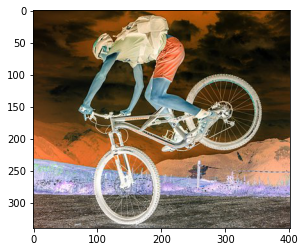

In [ ]:
im = Image.open(img_dir + "cycle.jpg")
im_t = im.point(lambda x: 255 - x)
plt.imshow(im_t)

### 2.2 Log transformation in PIL

<Figure size 432x288 with 0 Axes>

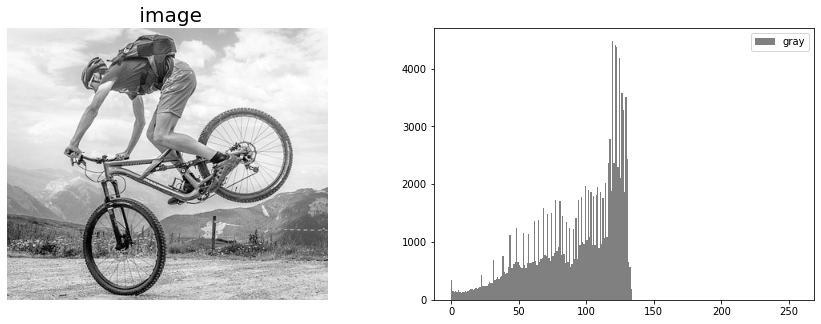

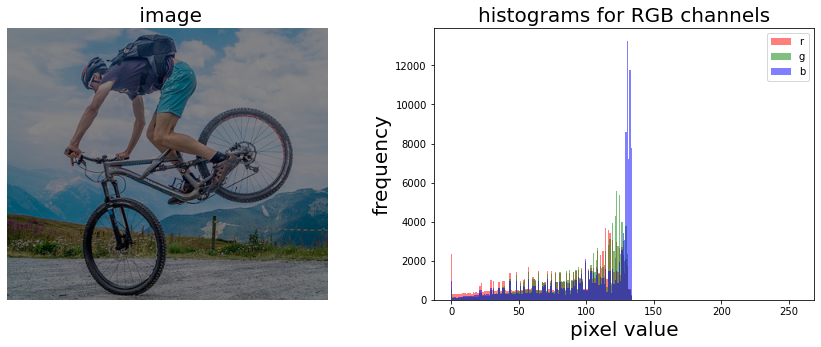

In [ ]:
# on the Gray image:
im_g = im.convert('L')
im_log = im_g.point(lambda x: 255*np.log(1+x/255))
plt.gray()
plot_quadrants(np.array(im_log))

#on the rgb image:
im = im.point(lambda i: 255*np.log(1+i/255))
plot_quadrants(np.array(im))

### 2.3  Power-law transformation in PIL


<Figure size 432x288 with 0 Axes>

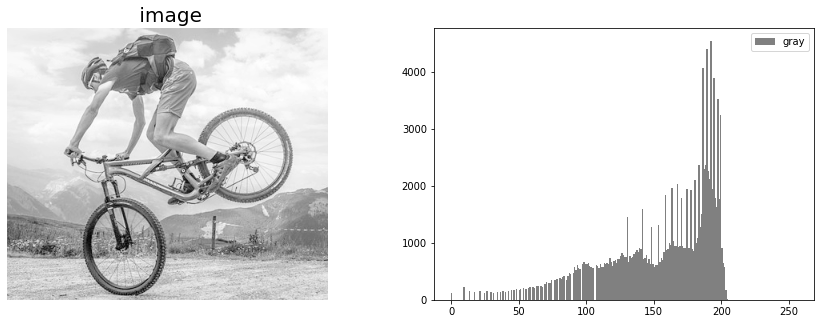

In [ ]:
im_power = im_g.point(lambda x: 255*(x/255)**0.6)
plt.gray()
plot_quadrants(np.array(im_power))


## <font color='green'><b> 2.4 Contrast Stretching </b></font>

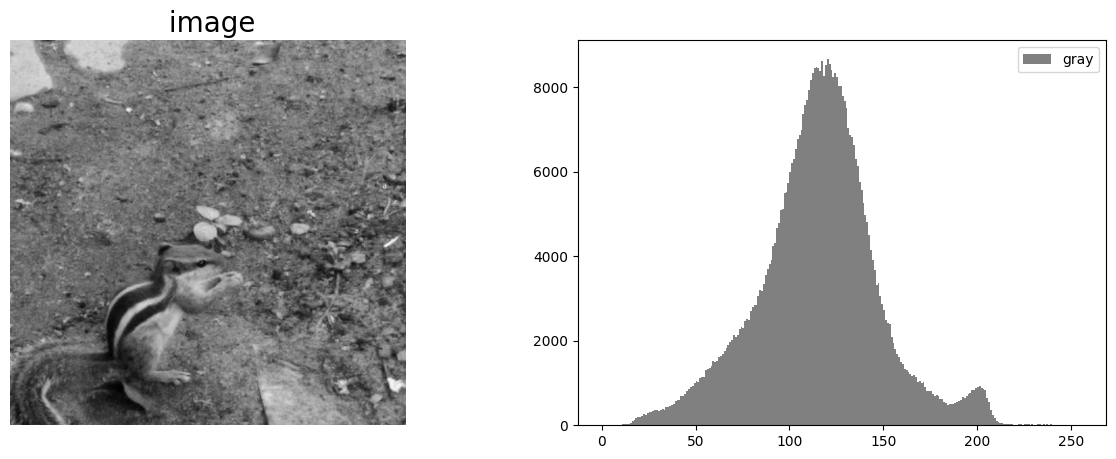

In [71]:
from skimage.color import rgb2gray
from skimage import img_as_float, img_as_ubyte

im =imread(img_dir + 'squirrel.jpg')
 
gray = img_as_ubyte(rgb2gray(im)) #check the output of the rgb2gray function...
plot_quadrants(gray)

### <font color='green'><b> 2.4.1- Using the Look Up Table (LUT) from the *Opencv* library</b></font> 

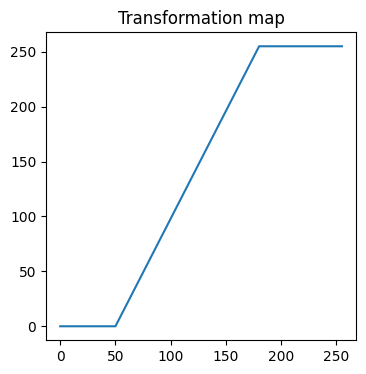

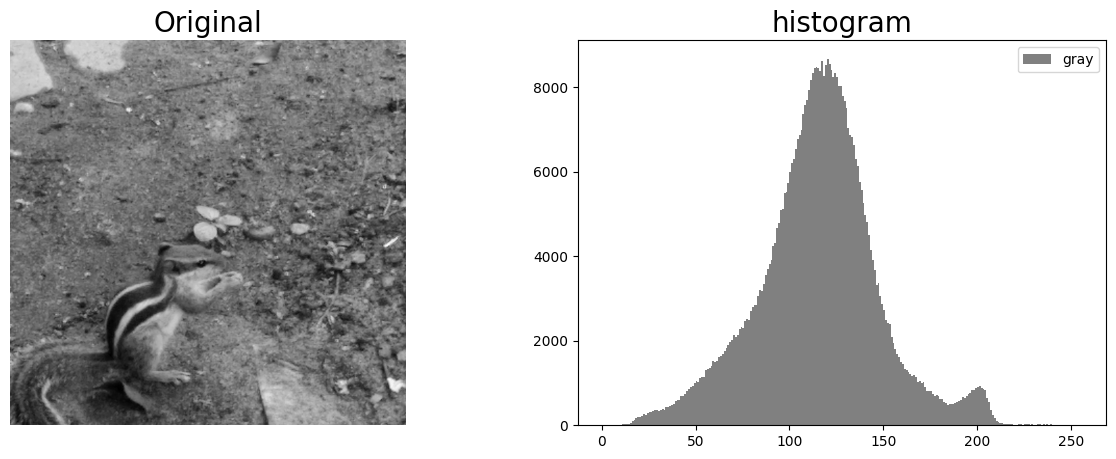

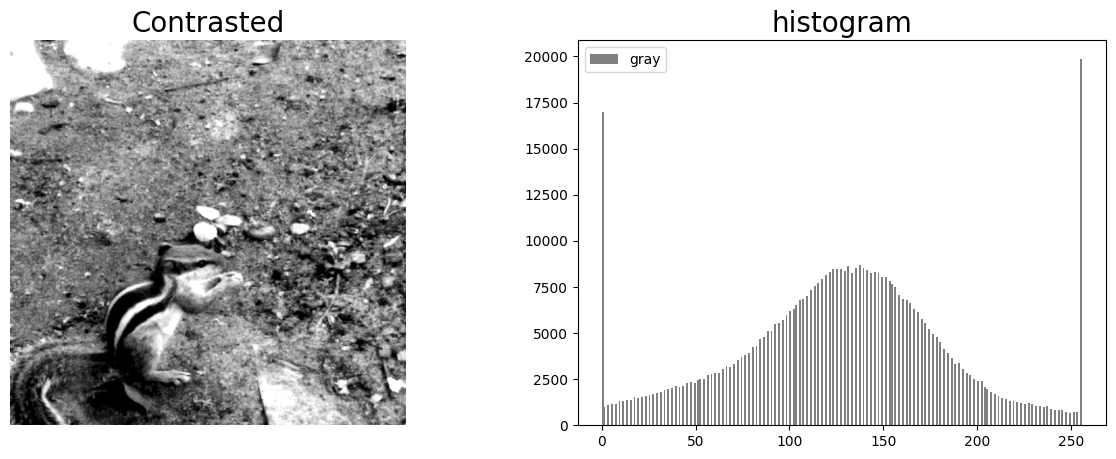

In [93]:
#1: defining and using *tables*
xp = [0, 50, 180, 255]
fp = [0, 0,  255, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8') # Look at the help for np.interp
contrasted = cv2.LUT(gray, table)

plt.figure(figsize=(4,4))
plt.plot(xp,fp)
plt.title('Transformation map')


plot_quadrants(gray, title='Original')
plot_quadrants(contrasted, title='Contrasted')

### 2.4.2- Using the function `normalize` from the *Opencv* library


Text(0.5, 1.0, 'normalized')

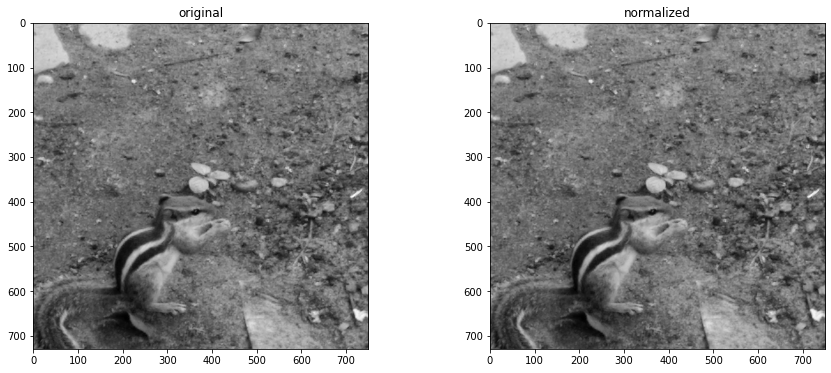

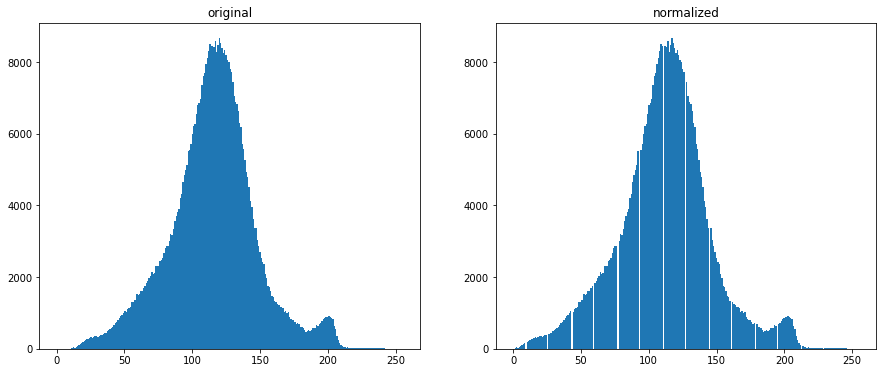

In [ ]:
norm_img1 = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX) #https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#normalize
  
# display input and output images
plt.figure(figsize= (15,6))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(norm_img1, cmap='gray')
plt.title('normalized')
 

# display input and  output histograms for inspection
plt.figure(figsize= (15,6))
plt.subplot(121)
plt.hist(gray.ravel(), bins=256, range=(0, 255)) #calculating histogram
plt.title('original')

plt.subplot(122)
plt.hist(norm_img1.ravel(), bins=256, range=(0, 255)) #calculating histogram
plt.title('normalized')
 

### 2.4.3  Using the library `ImageEnhance` in *PIL*  

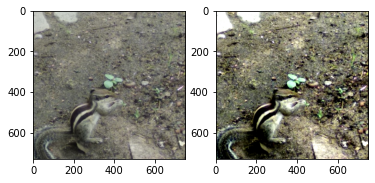

In [ ]:
from PIL import ImageEnhance

im = Image.fromarray(im)
contrast = ImageEnhance.Contrast(im)
transformed = Image.fromarray(np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (im.height, im.width, 3)))  

plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(transformed)

### <font color='green'><b> 2.4.4 Using the library `exposure` in *skimage* </b></font>

43.0 192.0


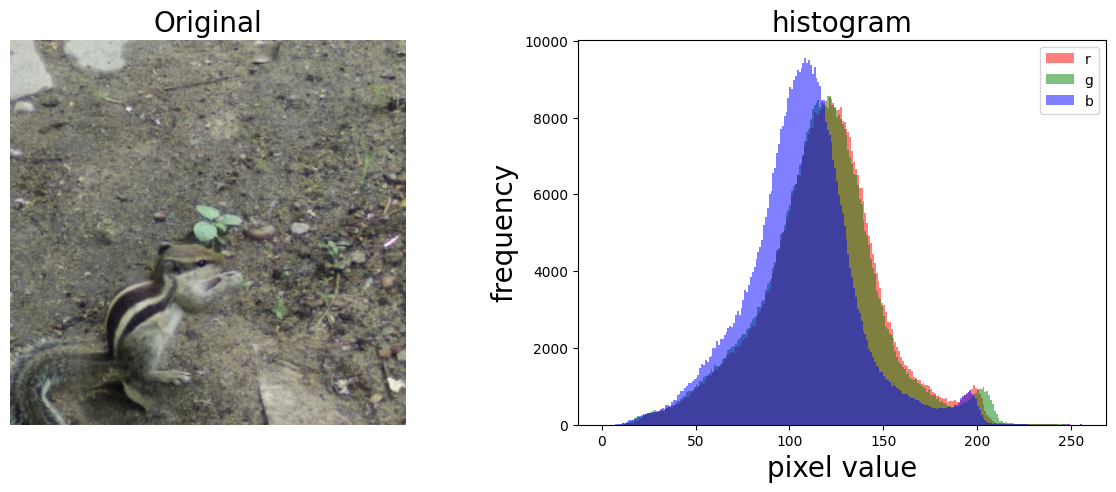

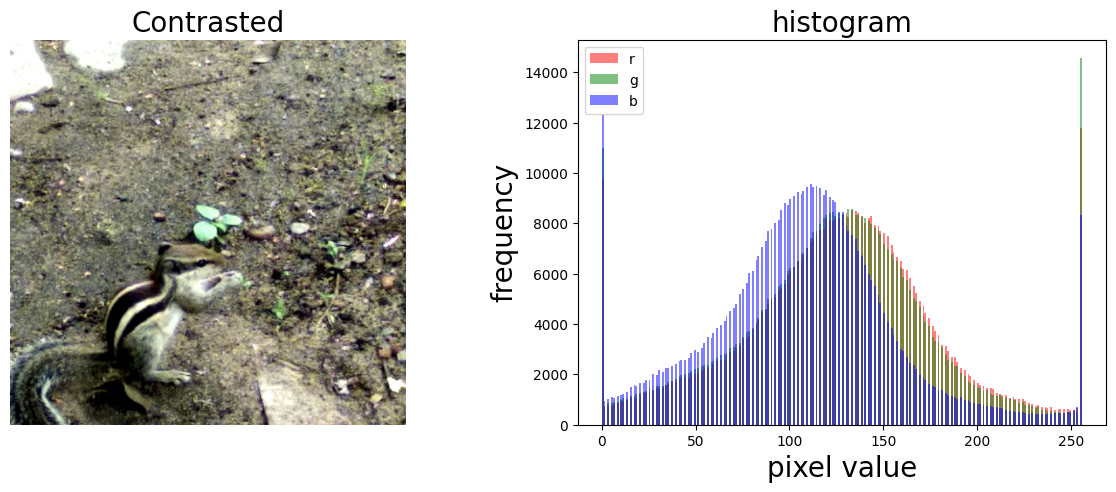

In [94]:
from skimage import exposure, color
from skimage.io import imread

im = imread(img_dir + "squirrel.jpg") # read image from disk, provide the correct path

# to avoid the neutralization of the contrast stratching action by few very dark or very clear pixels
p2 = np.percentile(im, 2)
p98 = np.percentile(im, 98)
print(p2, p98)

img_rescale = exposure.rescale_intensity(im, (p2, p98))
 
plot_quadrants(im, title='Original')
plot_quadrants(img_rescale, title='Contrasted')

- ### <font color='green'><b>EXERCISE 4: </b></font>


Try to implement by yourself the function `img_rescale = rescale(img, percentiles=[2,98])`, so that

- `img` is a numpy uint8 image
- `percentiles` is a list of two elements, corresponding to the lower and upper percentiles to be considered for the linear stretching to cover the whole range [0,255].
- compute the percentiles and the LUT referring to the gray level image, then apply the transformation to the r,g,b channels separately, and concatenate them to obtain the contrasted RGB image 


Hint: use the `np.percentile`, the `np.interp`, and the `cv2.LUT` function

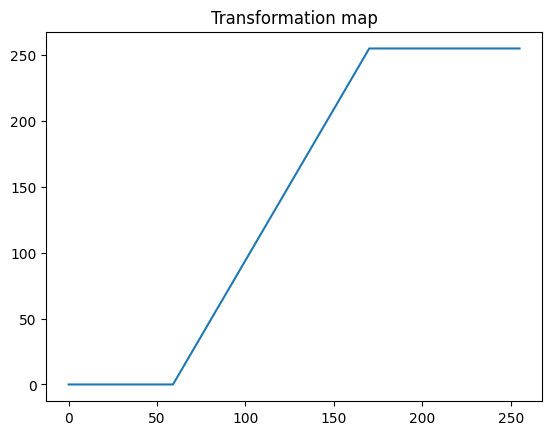

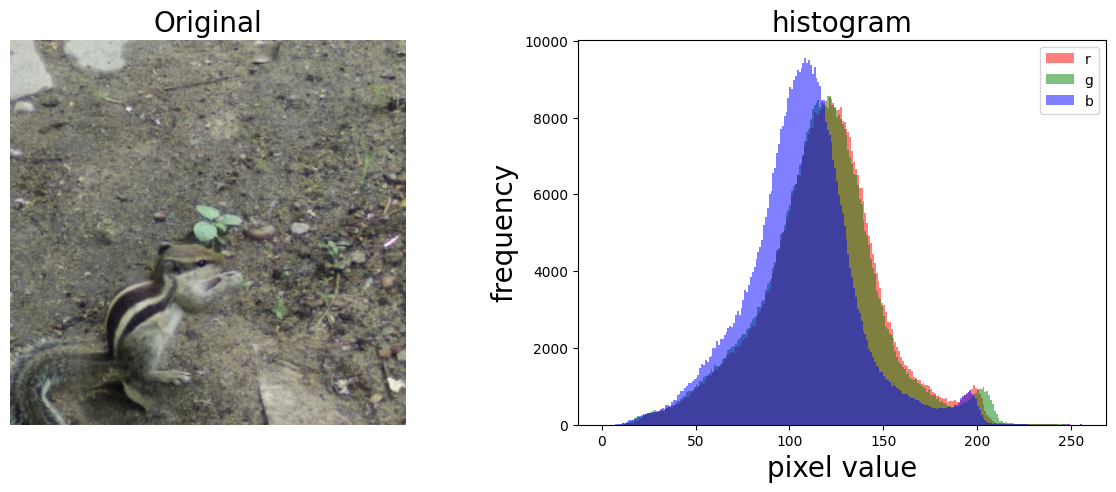

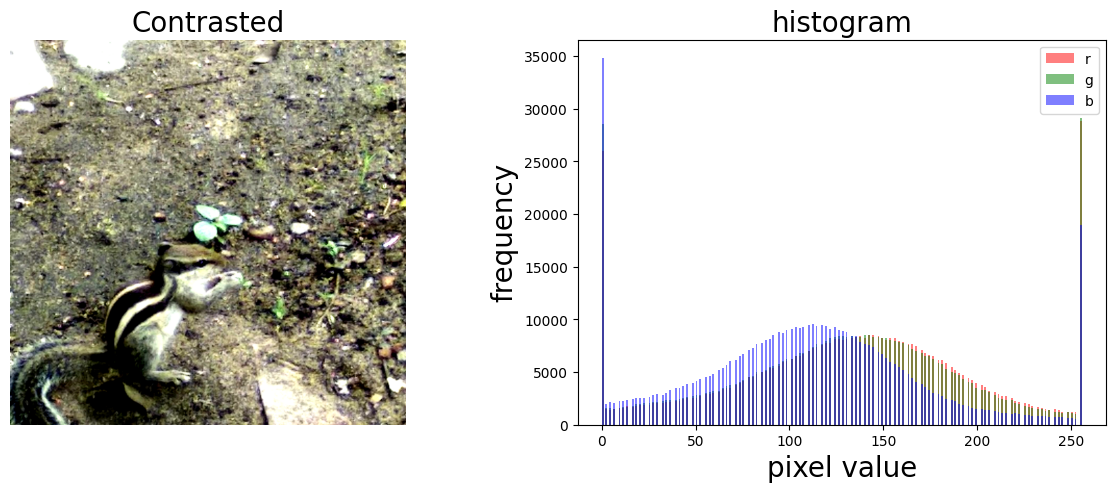

In [97]:
def rescale(im, percentiles=[2,98]):
#TO DO

  gray = img_as_ubyte(color.rgb2gray(im)) #check the output of the rgb2gray function...
  pMin = np.percentile(gray, percentiles[0])
  pMax = np.percentile(gray, percentiles[1])

  xp = [0, pMin,  pMax, 255]
  fp = [0, 0,  255, 255]
  x = np.arange(256)
  table = np.interp(x, xp, fp).astype('uint8') # Look at the help for np.interp

  r_contrasted = cv2.LUT(im[:,:,0], table)
  g_contrasted = cv2.LUT(im[:,:,1], table)
  b_contrasted = cv2.LUT(im[:,:,2], table)
  contrasted = np.dstack((r_contrasted, g_contrasted, b_contrasted))
  plt.figure()
  plt.plot(xp,fp)
  plt.title('Transformation map')
  plot_quadrants(im, 'Original')
  plot_quadrants(contrasted, 'Contrasted') 
  return contrasted

im_transformed = rescale(im, [5,95])

- ### <font color='gray'><b>EXERCISE 5: </b></font>

One step more: are you able to compute a certain percentile just using the cdf?
Write a function `percentile(img, perc)` that compute and return the percentile perc on the cdf of img.

Then substitute the call to np.percentile in exercise 4 with the call to your own function

In [98]:
def percentile (img, perc):
  frac = perc/100
  hist, _ = np.histogram(img_as_ubyte(color.rgb2gray(img)).flatten(), 256, [0,255])
  
  cdf = hist.cumsum()
  normalized_cdf = cdf / float(cdf.max())

  res = np.where(normalized_cdf <frac)
  pos_lower = res[0][-1]
  if (normalized_cdf[pos_lower] - frac) < (normalized_cdf[pos_lower+1] - frac):
    return pos_lower
  else:
    return pos_lower+1

percentile(im, 2)
 

43

## <font color='green'><b>2.5  Histogram Equalization with *skimage* </b></font>


- `equalize_hist`

- `equalize_adapthist` implement an adaptive histogram equalization based on the CLAHE algorithm (https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist)

*Contrast Limited Adaptive Histogram Equalization* (CLAHE):

An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.

- clip_limitfloat normalized between 0 and 1 (higher values give more contrast).

- when executed on color images, it transforms it into HSV, contrasts the V layer and converts back to RGB

<Figure size 640x480 with 0 Axes>

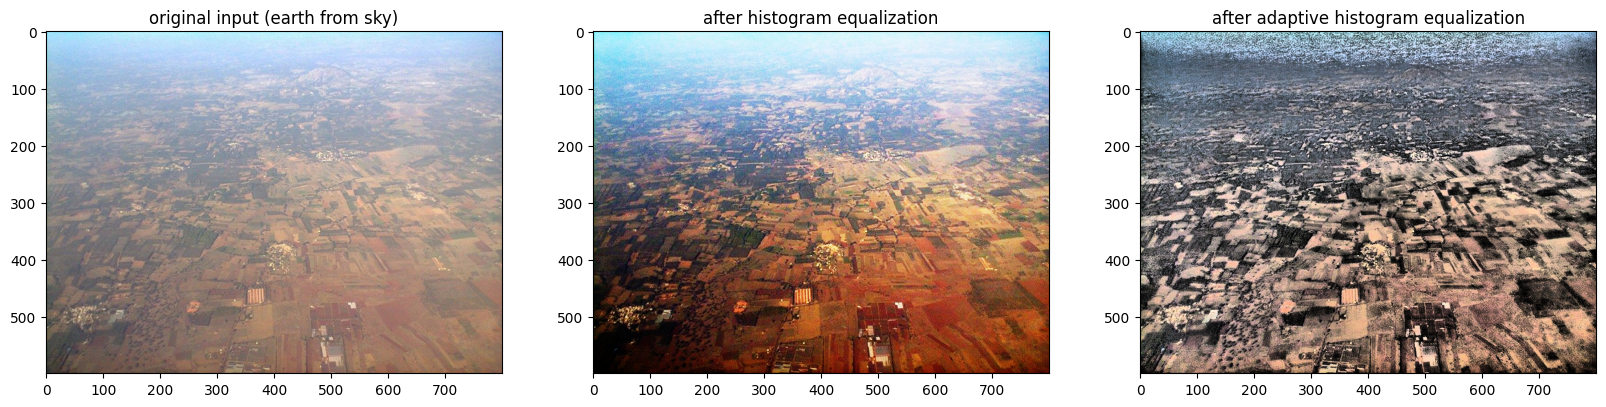

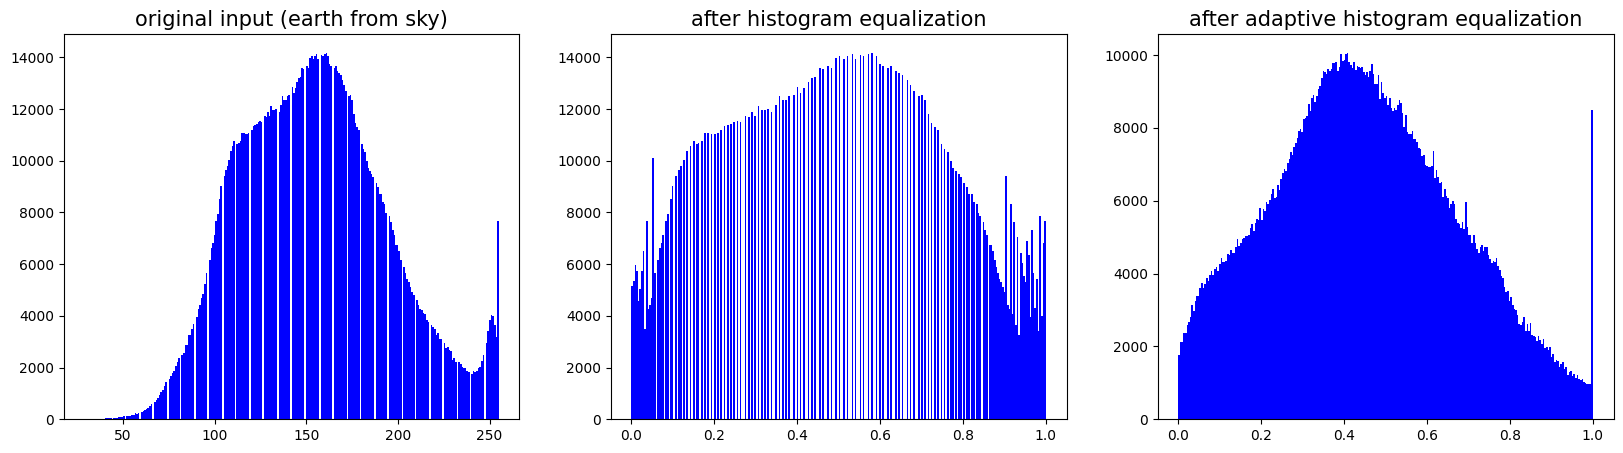

In [100]:
from skimage.color import rgb2gray
 
img = imread(img_dir + 'earthfromsky.jpg')

# histogram equalization
img_eq = exposure.equalize_hist(img)

# adaptive histogram equalization
#https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
# clip_limitfloat normalized between 0 and 1 (higher values give more contrast).
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.3)
plt.gray()

images = [img, img_eq, img_adapteq]
titles = ['original input (earth from sky)', 'after histogram equalization', 'after adaptive histogram equalization']

plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1), plt.imshow(images[i]), plt.title(titles[i])
plt.show()

plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1), plt.hist(images[i].ravel(), bins=256, color='b'), plt.title(titles[i], size=15)
plt.show()

# <font color='gray'><b> 3 - Miscellaneous </b></font>

### 3.1 Changing pixel values of an image randomly  


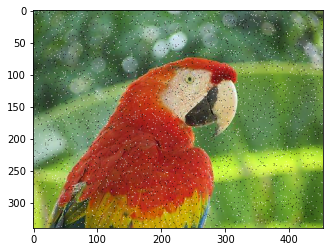

In [ ]:

im = Image.open(img_dir + "parrot.png")
# choose 5000 random locations inside image
im1 = im.copy() # keep the original image, create a copy
n = 5000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height,n)
for (x,y) in zip(x,y):
    im1.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255))) # salt-and-pepper noise
plt.imshow(im1)

### 3.2 Drawing on an image  

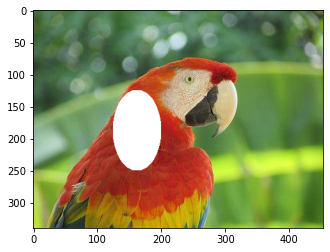

In [ ]:
im = Image.open(img_dir + "parrot.png")
draw = ImageDraw.Draw(im)
draw.ellipse((125, 125, 200, 250), fill=(255,255,255,128))
del draw
plt.imshow(im)